In [4]:
import pandas as pd
#importing Dataset
df1 = pd.read_csv("real_estate_value.csv")
df1

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
#Data Describing
df1.describe()

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
# checking null values and 'na' values in the data
print(df1.isnull().sum().sum())
print(df1.isna().sum().sum())

0
0


In [7]:
### checking correlation among various input features and target variable
df1.corr()

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
HouseAge,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
DistanceToMRT,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
NoOfStores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
UnitPrice,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [9]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test,y_train, y_test = train_test_split(df1[['HouseAge','DistanceToMRT','NoOfStores','Latitude','Longitude']],df1[['UnitPrice']] ,random_state=104,test_size=0.30,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((289, 5), (125, 5), (289, 1), (125, 1))

In [17]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
#Performance Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.5952
Mean Squared Error: 101.99304444444446
Root Mean Squared Error: 10.099160581179232


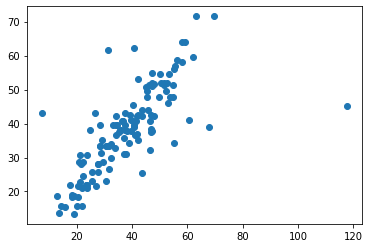

In [21]:
plt.scatter(y_test,y_pred)

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
regressor.fit(X_train, y_train)  

C:\Users\msaiprasad\AppData\Local\Temp\ipykernel_9552\3218993038.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [40]:
y_pred = regressor.predict(X_test)

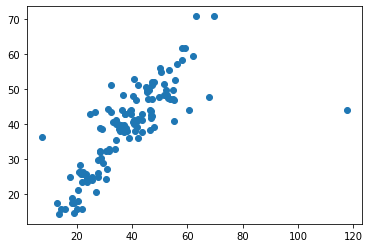

In [41]:
plt.scatter(y_test,y_pred)

In [42]:
prediction = regressor.predict(X_test)
prediction

array([58.109     , 46.93700476, 32.783     , 26.099     , 42.704     ,
       32.298     , 21.12      , 32.298     , 42.528     , 54.83086667,
       48.322     , 38.67466667, 37.7473    , 48.322     , 41.117     ,
       47.56705714, 40.285     , 38.525     , 25.923     , 25.7744    ,
       43.25066667, 51.9265    , 43.704     , 38.47639048, 51.08033333,
       42.328     , 51.836     , 17.399     , 43.283     , 50.39832222,
       43.92      , 17.362     , 50.988     , 51.16366667, 38.7739    ,
       37.838     , 29.503     , 25.745     , 42.704     , 24.355     ,
       39.49641667, 44.156     , 28.253     , 46.99675   , 14.241     ,
       43.794     , 36.0509    , 46.91775   , 35.42475   , 57.16345   ,
       47.08966667, 43.704     , 61.669     , 46.852     , 42.6814    ,
       49.70429405, 49.50833333, 40.662     , 25.542     , 26.099     ,
       36.07066667, 39.841     , 17.362     , 17.899     , 32.298     ,
       14.47      , 38.043     , 39.651     , 24.76      , 70.69

In [43]:
from sklearn import metrics

In [44]:
#performance Metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  5.199179828571427
Mean Squared Error: 85.54106866661773
Root Mean Squared Error: 9.248841476996875
Mean Absolute Percentage Error: 0.16048382980701242
R^2: 0.6087480525820879
